Dupla:\
Gabriel Magalhães Paiva\
Jayme de Queiroz

In [57]:
#Load dependencies
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [58]:
#Load GraphMissingEdges
G = nx.read_gml("../predio-de-links-utfpr-2024-1\GraphMissingEdges.gml")

In [75]:
#Load Categories
categories_map = pd.read_csv('../predio-de-links-utfpr-2024-1\categories.csv')

In [ ]:
# Visualizar a rede
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=False, node_size=10)
plt.title("Netowrk Visualization")
plt.show()

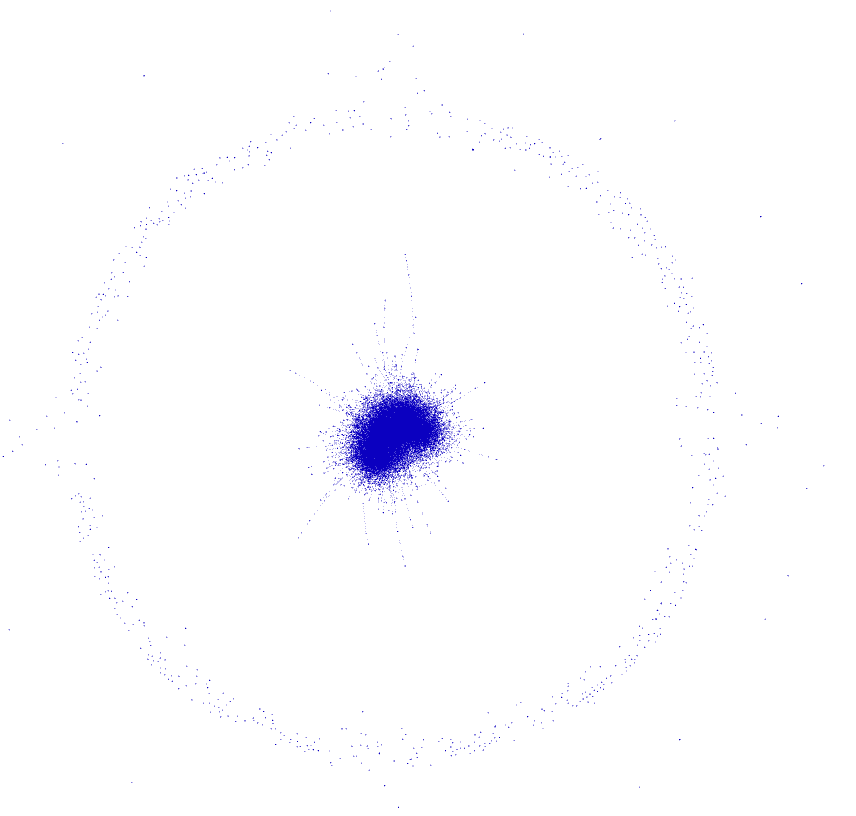

In [130]:
# Número de nós e arestas
num_nodes = len(G.nodes)
num_edges = len(G.edges)

# Densidade da rede
density = nx.density(G)

# Grau médio dos nós
avg_degree = sum(dict(G.degree()).values()) / num_nodes

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Network density:", density)
print("Average node degree:", avg_degree)

import numpy as np

# Calculate the average degree
K = np.mean([d for n, d in G.degree()])

# Get the number of nodes in the graph
N = len(G.nodes())

# Compare with the thresholds
if K < 1:
    condition = "Subcritical"
elif K == 1:
    condition = "Critical"
elif K > 1:
    condition = "Supercritical"
if K > np.log(N):
    condition = "Connected"

print(f"The average degree is {K}. Thus, graph condition is: {condition}")

Number of nodes: 4575
Number of edges: 18991
Network density: 0.0018150582646987846
Average node degree: 8.302076502732241
The average degree is 8.302076502732241. Thus, graph condition is: Supercritical


### Analise de densidade e grau médio
A partir dos calculos do bloco de código acima, podemos concluir que apesar de ser uma rede grande, a densidade da mesma é baixa.
O grau médio 8 indica que a rede está no estado Super crítico.

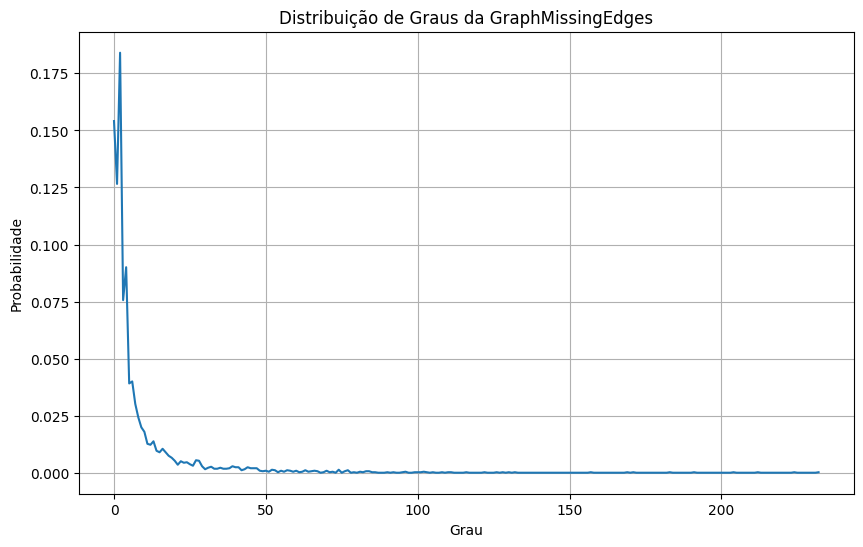

In [133]:
# Distribuição de graus
degree_sequence_challenge = [d for n, d in G.degree()]
degree_counts_challenge = np.bincount(degree_sequence_challenge)
degree_distribution_challenge = degree_counts_challenge / degree_counts_challenge.sum()

# Plotar a distribuição de graus da rede fornecida
plt.figure(figsize=(10, 6))
plt.plot(range(len(degree_distribution_challenge)), degree_distribution_challenge)
plt.title("Distribuição de Graus da GraphMissingEdges")
plt.xlabel("Grau")
plt.ylabel("Probabilidade")
plt.grid(True)
plt.show()


In [63]:
def compute_centrality(centrality_callback):
    # Compute degree centrality
    centrality = centrality_callback(G)

    # Sort nodes by degree centrality and get top 5
    top_5_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]

    # Print top 5 places with their categories
    print("Top 5 places according to centrality:")
    for node, centrality in top_5_centrality:
        print(f"Place: {G.nodes[node].get('name','Empty')}")
        print(f"Centrality: {centrality}")
        print(f"Categories: {G.nodes[node]['categories']}\n")
    
    return centrality

In [64]:

# Centralidade de grau
print('Degree Centrality:')
degree_centrality = compute_centrality(nx.degree_centrality)

Degree Centrality:
Top 5 places according to centrality:
Place: Gaucho Parrilla Argentina
Centrality: 0.050721469173589856
Categories: 221,64,1,83

Place: Condado Tacos
Centrality: 0.04897245299519021
Categories: 1,393,275,208,58,651

Place: Noodlehead
Centrality: 0.04634892872759073
Categories: 370,1,620,641

Place: täkō
Centrality: 0.04459991254919108
Categories: 1,420,651

Place: Bakersfield
Centrality: 0.04175776125929165
Categories: 58,275,393,208,420,83,651,1



In [65]:
# Centralidade de proximidade
print('Closeness Centrality:')
closeness_centrality = compute_centrality(nx.closeness_centrality)

Closeness Centrality:
Top 5 places according to centrality:
Place: Gaucho Parrilla Argentina
Centrality: 0.3386633071802575
Categories: 221,64,1,83

Place: täkō
Centrality: 0.3366922122688829
Categories: 1,420,651

Place: Condado Tacos
Centrality: 0.3361849274032173
Categories: 1,393,275,208,58,651

Place: Smallman Galley
Centrality: 0.3337425582725102
Categories: 275,604,420,173,1,58,641

Place: Bakersfield
Centrality: 0.33370690582530665
Categories: 58,275,393,208,420,83,651,1



### Centralidades 

A disparidade nos valores de centralidades podem ser justificadas pelo fato de que um lugar pode ter muitas conexões diretas (alto grau), mas não estar necessariamente no caminho entre outros lugares (baixa intermediação).

In [66]:
# Detecção de comunidades
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)

print("Número de comunidades detectadas:", len(communities))


Número de comunidades detectadas: 883


O alto número de comunidades indica uma alta complexidade da formação do grafo, com multiplos grupos de nós de interagem de maneiras diferentes. 

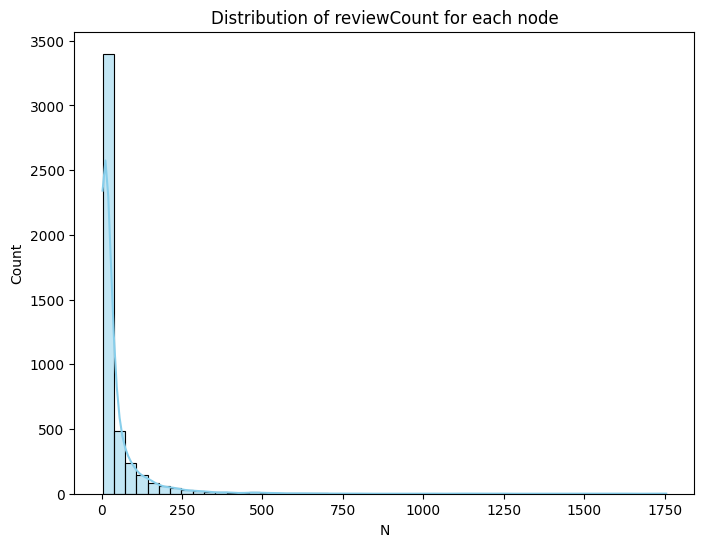

Mean: 42.48459016393443
Max: 1755
Min: 3


In [151]:
import seaborn as sns
# Extract review counts

review_counts = [int(G.nodes[node]['reviewCount']) for node in G.nodes()]

# Plot distribution
plt.figure(figsize=(8, 6))
sns.histplot(review_counts, kde=True, color='skyblue', bins=50)
plt.title('Distribution of reviewCount for each node')
plt.xlabel('N')
plt.ylabel('Count')
plt.show()

np_review_counts = np.array(review_counts)
print(f'Mean: {np_review_counts.mean()}')
print(f'Max: {np_review_counts.max()}')
print(f'Min: {np_review_counts.min()}')

A rede tem grande disparidade de número de revisões por estabelecimento.
Podemos notar isso através da curva exponencial no gráfico.

In [159]:
from pprint import pprint
from copy import copy
categories_map.head()
# Set "CategoryId" as the index and convert to dictionary
category_mapping = copy(categories_map)
category_dict = category_mapping.set_index("CategoryId")["names"].to_dict()

pprint(list(category_dict.items())[:10])

[(0, 'Town Car Service'),
 (1, 'Restaurants'),
 (2, 'Wedding Planning'),
 (3, 'Professional Services'),
 (4, 'Comic Books'),
 (5, 'Venues & Event Spaces'),
 (6, 'Computers'),
 (7, 'Axe Throwing'),
 (8, 'Cycling Classes'),
 (9, 'Creperies')]


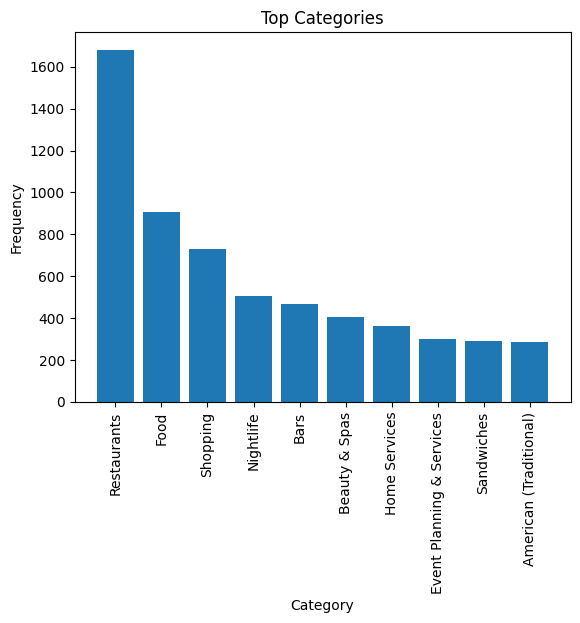

In [86]:
# Extract categories
categories = [G.nodes[n]["categories"].split(',') for n in G.nodes]

# Flatten list of categories
categories_flat = [category for sublist in categories for category in sublist]

# Count occurrence of each category
category_counts = {category: categories_flat.count(category) for category in set(categories_flat)}

# Plot top categories
top_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:10]

categories_labels = [category_dict[int(category[0])] for category in top_categories]
categories_values = [category[1] for category in top_categories]

plt.bar(categories_labels, categories_values)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Top Categories")
plt.xticks(rotation=90)
plt.show()

### Categorias 
Existem 892 diferentes categorias, onde os estabelecimentos de alimentação se destacam.
Na parte 2 do desafio poderemos aplicar feature engineering para reduzir a dimenção desta feature.

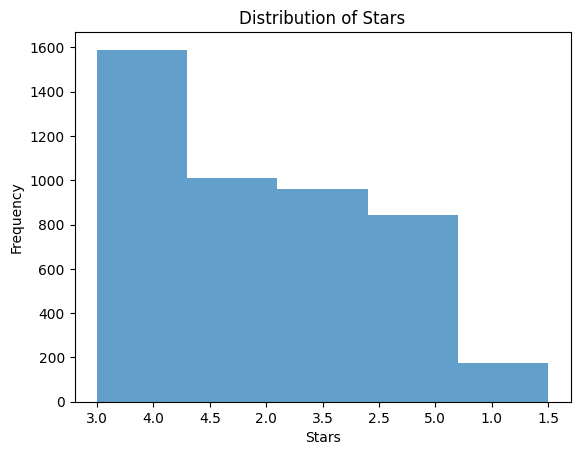

In [69]:
# Extract stars
stars = [G.nodes[n]["stars"] for n in G.nodes]

# Plot histogram of stars
plt.hist(stars, bins=5, alpha=0.7)
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.title("Distribution of Stars")
plt.show()


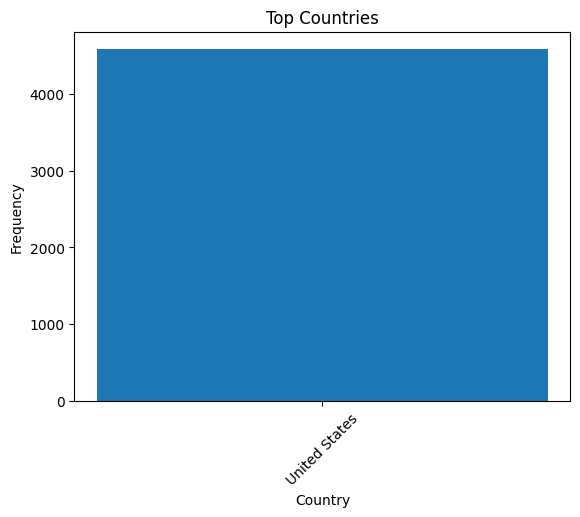

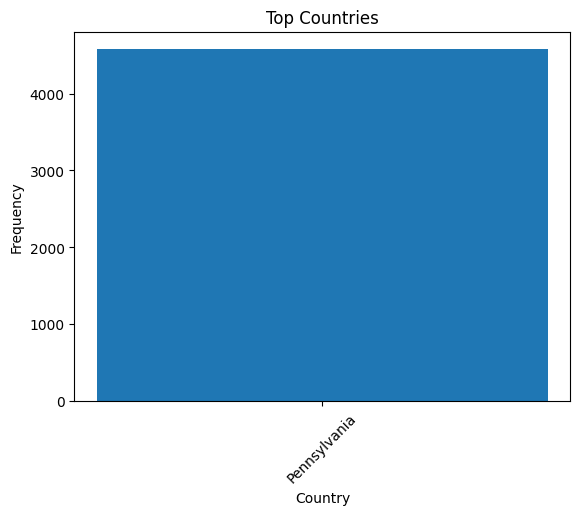

In [88]:
from geopy.geocoders import Nominatim
from functools import lru_cache

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="mobility_network_analysis")

# Add cache to reduce execution time
@lru_cache(maxsize=None)

# Function to get country from latitude and longitude
def get_country_state(latitude, longitude):
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    if location:
        address = location.raw.get("address")
        if address:
            country = address.get("country")
            state = address.get("state")
            return country, state
    return None, None

# Get latitude and longitude of each node
node_coordinates = {node: (G.nodes[node]["latitude"], G.nodes[node]["longitude"]) for node in G.nodes}

# Reverse geocode coordinates to get country
node_countries = {node: get_country_state(coords[0], coords[1]) for node, coords in node_coordinates.items()}

# Count occurrences of each country
country_counts_map = {}
state_counts_map = {}
for country_state in node_countries.values():
    if type(country_state) == tuple:
        country_counts_map[country_state[0]] = country_counts_map.get(country_state[0], 0) + 1
        state_counts_map[country_state[1]] = state_counts_map.get(country_state[1], 0) + 1
    else:
        country_counts_map[country_state] = country_counts_map.get(country_state, 0) + 1

# Sort countries by frequency
sorted_countries = sorted(country_counts_map.items(), key=lambda x: x[1], reverse=True)
# Sort states by frequency
sorted_states = sorted(state_counts_map.items(), key=lambda x: x[1], reverse=True)

# Plot top countries
top_countries = sorted_countries[:10]
country_names = [country[0] for country in top_countries]
country_counts = [country[1] for country in top_countries]

plt.bar(country_names, country_counts)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top Countries")
plt.xticks(rotation=45)
plt.show()

# Plot top states
top_states = sorted_states[:10]
state_names = [state[0] for state in top_states]
state_counts = [state[1] for state in top_states]

plt.bar(state_names, state_counts)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top Countries")
plt.xticks(rotation=45)
plt.show()


In [ ]:
links_df = pd.DataFrame(columns=['stars1', 'stars2', 'reviewCount1', 'reviewCount2'])

for link in G.edges:
    node1 = G.nodes[link[0]]
    node2 = G.nodes[link[1]]
    reviewCount1 = node1['reviewCount']
    reviewCount2 = node2['reviewCount']
    stars1 = node1['stars']
    stars2 = node2['stars']
    
    # Append data to DataFrame
    links_df = links_df._append({
        'stars1': stars1,
        'stars2': stars2
    }, ignore_index=True)


In [ ]:
import pandas as pd
import seaborn as sns

correlation_matrix = links_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

# Identify most important attribute
most_important_attribute = correlation_matrix.idxmax()
correlation_value = correlation_matrix.max()

print("Most important attribute to define links:", most_important_attribute)
print("Correlation with links:", correlation_value)
